<a href="https://colab.research.google.com/github/johnsigma/meuPortfolio/blob/master/Avalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação de Risco de Crédito

Neste projeto vamos abordar um assunto que causa muitos prolbemas para bancos e instituições financeiras em geral, que a taxa de inadimplência por parte de clientes desras instituições.

Ser capaz de avaliar a probabilidade de um cliente não cumprir com suas obrigações financeiras é extremamente importante para qualquer banco ou instuição financeira que disponibiliza crédito a seus clientes. A não avaliação do risco de crédito por parte das instuições financeiras pode causar um grande impacto no balanço e economia destas empresas. Então, cada vez mais, soluções para avaliar se um cliente pode ou não pagar sua conta no banco (sejam financiamentos ou dívidas de cartão de crédito) vêm sendo desenvolvidas a fim de preservar a integridade financeiras das instuições de crédito.

![alt text](https://github.com/johnsigma/meuPortfolio/blob/master/imagens/bank.jpg?raw=true)

<a href='https://www.freepik.com/free-photos-vectors/background'>Background vector created by pikisuperstar - www.freepik.com</a>

Das soluções encontradas para evitar clientes inadimplentes, uma delas é a aposta em modelos de *Machine Learning* para prever, por exemplo, a probabilidade de um cliente deixar de cumprir suas obrigações financeiras com a empresa.

## Contextualizando o problema

A [Nubank](https://nubank.com.br/sobre-nos) é uma empresa que tem, cada vez mais, investido em Inteligência Artificial e times de *Data Science*. E neste projeto iremos utilizar um conjunto de dados disponibilizado para uma competição de Data Science promovido pela Nubank.

Neste projeto, nosso objetivo é instanciar, treinar e avaliar um modelo de *Machine Learning* para prever qual a probabilidade de um possível cliente do Nubank não cumprir com suas obrigações financeiras e deixar de pagar sua fatura do cartão de crédito.

Importante ressaltar que essa avalição de risco de crédito deve ser realizada no momento em que o cliente solicita o cartão de crédito da emopresa, normalmente este é o primeiro contato com a instituição.

![alt text](https://github.com/johnsigma/meuPortfolio/blob/master/imagens/nubank_logo.png?raw=true)




## Importando os dados

Nesta etapa vamos importar os dados e algumas bibliotecas que iremos utilizar neste projeto. Os dados estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Ele está em formato `csv`.

In [5]:
# importando os pacotes e bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
import numpy as np

# filtrar as mensagens de avisos dos códigos
import warnings
warnings.filterwarnings('ignore')

# garantir replicabilidade
np.random.seed(42)

# importando o dataset para um dataframe
df = pd.read_csv('http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


---

## Análise Exploratória dos dados

É nesta etapa que vamos conhecer nossa base de dados. Primeiramente vamos analisar as dimensões do nosso *dataset*, quantas colunas, entradas ele possui, etc. Isso é importante para conhecermos com que variáveis estamos trabalhando.

In [6]:
# dimensões de df
print('DIMENSÕES DO DATAFRAME')
print(f'Entradas (linhas):\t{df.shape[0]}')
print(f'Colunas (variáveis):\t{df.shape[1]}')

DIMENSÕES DO DATAFRAME
Entradas (linhas):	45000
Colunas (variáveis):	43


Com o código acima vimos que nosso conjunto de dados é composto por 45000 entradas (linhas) e 43 colunas (variáveis ou *features*).

Vamos agora imprimir as 5 primeiras entradas do nosso dataset, é agora que vamos ver quais são suas variáveis.

In [7]:
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Podemos tirar algumas conclusões iniciais a respeito desse *dataset*:
* A coluna `ids` representa um identificador único para cada cliente. Posteriormente iremos eliminar esta coluna do nosso *dataset*, pois ela não contém nenhuma informação útil para nós.
* Como a coluna `ids`, iremos, posteriormente, apagar a coluna `external_data_provider_first_name` pelos mesmos motivos da coluna `ids`.
* Há muitas colunas com valores codificados como `score_1` e `score_2`. Mais a frente podemos avaliar se há classes nessas colunas que podem ser convertidas em informação relevante para nós.
* Nossa variável alvo para analisar o risco de inadimplência (*default*) está na coluna `target_default`.


### Relatório do *dataset*

A seguir vou imprimir um pequeno relatório levantado encima do nosso conjunto de dados. Nele há informções como:
* Nome e tipo das colunas
* Quantidade de valores ausentes
* Valores únicos que uma coluna contém (importante para sabermos se uma variável é categórica ou não).

In [8]:
print(f'\nNomes da coluna / Tipo da coluna\n\n{df.dtypes}')
print(f'\n\nTotal de dados ausentes: {df.isnull().sum().values.sum()}')
print(f'\nPorcentagem de dados ausentes por coluna:\n{((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)}')
print(f'\nValores únicos por coluna:\n{df.nunique().sort_values()}')


Nomes da coluna / Tipo da coluna

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip  

Através deste pequeno relatório podemos perceber algumas coisas bem interessantes sobre nosso conjunto de dados:
* Há muitos valores ausentes para tratar, com algumas colunas tendo mais de 50% dos valores ausentes.
* Muitas das nossas variáveis são categóricas.
* Apesar de ter muitos valores ausentes, muitos deles representam 0. Por exemplo nas variáveis `last_amount_borrowed` e `last_borrowed_in_months`, onde o valor ausente `NaN` pode ser interpretado como 0, isso também pode ser interpretado para a variável `credit_limit`.
* Que nossa variável alvo contém mais de 7% de seus valores como ausentes. Posteriormente iremos deletar as entradas que estão com essa coluna como valor ausente.
* Que as variáveis `external_data_provider_credit_checks_last_2_year` e `channel` contém apenas 1 classe. Então iremos excluir essas colunas na etapa de preparação de dados.

### Relatório Estatístico

Agora vamos executar o método `describe` que nos fornece um relatório estatístico das nossas variáveis numéricas. Este método é bem útil para analisar se há valores *outliers* nas nossas colunas.

In [9]:
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Percebemos que:
* A variável `external_data_provider_credit_checks_last_2_year` têm todas as suas informações estatísticas como 0.0.
* A variável `reported_income` possui valores `np.inf`, iremos substituir esses valores para `np.nan`.
* A variável `external_data_provider_email_seen_before` tem o valor mínimo como -999.0, o que não faz sentido se comparado as outras colunas. Podemos concluir que se trata de um valor *outlier* ou que esses dados foram tratados inadequadamente. Iremos substituir os valores iguais a -999.0 por `np.nan`.

### Verificando o balanceamento das classes da variável alvo

Nesta etapa vamos plotar um gráfico com a distribuição das classes para nossa variável alvo, `target_default`. Ela nos diz se um cliente é ou não inadimplente. Vamos verificar também a porporção de clientes inadimplentes ou não comparados a todos os clientes.

Isso é importante para vermos o balanceamento das nossas classes.

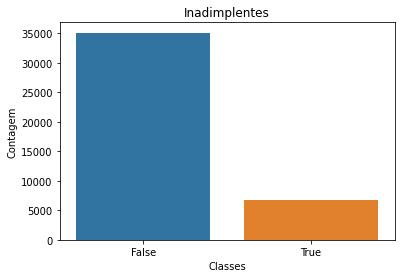


Proporção entre inadimplentes no Dataset:
False    77.955556
True     14.802222
Name: target_default, dtype: float64


In [10]:
fig, ax = plt.subplots()

sns.countplot(df.target_default, ax=ax)
ax.set_title('Inadimplentes')
ax.set_xlabel('Classes')
ax.set_ylabel('Contagem')

plt.show()

print('\nProporção entre inadimplentes no Dataset:')
print((df.target_default.value_counts() / df.shape[0])*100)

Percebemos que nossas classes estão bem desbalanceadas e vamos tratar disso na preparação dos dados.

Percebemos também que 77% dos clientes do banco não são inadimplentes, enquanto quase 15% o são.

---

## Preparação dos Dados

Esta etapa precede a etapa de instanciação do modelo de *Machine Learning*. É agora que vamos preparar nossos dados para treinar, avaliar e testar nosso modelo.

![alt text](https://github.com/johnsigma/meuPortfolio/blob/master/imagens/searching.jpg?raw=true)

<a href='https://www.freepik.com/vectors/business'>Business vector created by pikisuperstar - www.freepik.com</a>


Primeiro vamos focar nos prés-processamento que já haviamos definido na etapa de Análise Exploratória dos Dados, são eles:
* Remover as colunas inúteis (`ids`, `external_data_provider_first_name`, etc...).
* Tratar os valores ausentes.
* Tratar as colunas com valores codificados.



### Removendo Colunas Inúteis

Primeiramente vamos remover algumas colunas que não são úteis para nosso modelo de *Machine Learning*, vamos dividir esta etapa em outras micro-etapas:
* Remover as colunas `ids` e `external_data_provider_first_name`.
* Remover colunas com apenas 1 classe.

In [11]:
# removendo colunas ids e external_data_provider_first_name
df = df.drop(['ids', 'external_data_provider_first_name'], axis=1).copy()

# removendo colunas com 1 classe
df = df.drop(['external_data_provider_credit_checks_last_2_year', 'channel'], axis=1).copy()

### Tratando os valores ausentes

Vamos agora tratar as colunas com valores ausentes. Primeiro vamos verificar a natureza destes valores ausentes, pois como vimos anteriormente alguns desses valores ausentes podemos assumir como 0.

Primeiro, para as variáveis categóricas vamos preencher os dados ausentes com o valor mais frequente.

Depois, como dito anteriormente, vamos subtituir os valores `np.inf` da coluna `reported_income` por `np.nan`.

Após isso vamos plotar um *boxplot* para a variável `external_data_provider_email_seen_before`, pois, como visto no nosso resumo estatístico, essa coluna possui valores *outliers* e iremos substituir esses valores por `np.nan`.

Ressalto que substituir esses valores por `np.nan` significa preencher esses valores com valores ausentes, os quais iremos tratar mais a frente.

In [12]:
df_clean = df.copy()

In [13]:
# importanto o pacote necessário
from sklearn.impute import SimpleImputer

# extraindo as variáveis categóricas
colunas_cat = df_clean.select_dtypes(include='object').columns

# substituindo pelo valor mais frequente
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,colunas_cat])
df_clean.loc[:,colunas_cat] = imputer.transform(df_clean.loc[:,colunas_cat])

In [14]:
# substituindo np.inf por np.nan
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf,np.nan)

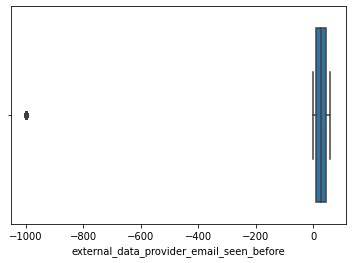

In [15]:
# boxplot da variável external_data_provider_email_seen_before
sns.boxplot(df_clean['external_data_provider_email_seen_before']);

Como vimos no nosso resumo estatístico, o valor *outlier* da nossa variável é o -999.0, vamos substituir ele por `np.nan`.

In [16]:
for (index,valor) in zip(df_clean['external_data_provider_email_seen_before'].index,df_clean['external_data_provider_email_seen_before']):
  if valor == -999:
    df_clean['external_data_provider_email_seen_before'][index] = np.nan

Agora vamos imprimir as 5 primeiras entradas apenas contendo as colunas que tem valores ausentes.

In [17]:
# primeiro vamos colocar em uma lista apenas as colunas que contém valores ausentes
col_valores_ausentes = []

# vamos usar um for para percorrer as colunas e verificar se nelas há valores ausentes
for (col,data) in df_clean.iteritems():
  if data.isnull().sum() > 0:
    col_valores_ausentes.append(col)

# agora vamos imprimir um dataframe apenas com as colunas com valores ausentes
df_clean[col_valores_ausentes].head()

,score_3,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,reported_income
0,350.0,0.40,25033.92,36.0,0.0,65014.12,NaN,0.0,0.0,18.0,18.0,0.0,51.0,57849.0
1,370.0,0.24,NaN,NaN,39726.0,100018.91,50.0,0.0,0.0,14.0,14.0,0.0,17.0,4902.0
2,360.0,0.29,7207.92,36.0,NaN,65023.65,NaN,0.0,0.0,10.0,NaN,NaN,9.0,163679.0
3,510.0,0.32,NaN,NaN,54591.0,68830.01,NaN,1.0,0.0,19.0,19.0,NaN,38.0,1086.0
4,500.0,0.18,NaN,NaN,NaN,60011.29,NaN,0.0,0.0,11.0,NaN,1.0,46.0,198618.0


Vamos agora imprimir quantos valores únicos essas colunas com valores ausentes têm. Isso pode nos dizer se alguma dessas colunas são categóricas, o que pode nos ajudar a pensar no que fazer com esses valores ausentes.

In [18]:
for col in col_valores_ausentes:
  print(f'Valores únicos da coluna {col}:  {df_clean[col].nunique()}, porcentagem de '
  f'valores ausentes: {(df_clean[col].isnull().sum()/df_clean.shape[0])*100}')

Valores únicos da coluna score_3:  88, porcentagem de valores ausentes: 1.248888888888889
Valores únicos da coluna risk_rate:  82, porcentagem de valores ausentes: 1.248888888888889
Valores únicos da coluna last_amount_borrowed:  14325, porcentagem de valores ausentes: 66.56888888888889
Valores únicos da coluna last_borrowed_in_months:  2, porcentagem de valores ausentes: 66.56888888888889
Valores únicos da coluna credit_limit:  20928, porcentagem de valores ausentes: 30.666666666666664
Valores únicos da coluna income:  41211, porcentagem de valores ausentes: 1.248888888888889
Valores únicos da coluna ok_since:  100, porcentagem de valores ausentes: 58.988888888888894
Valores únicos da coluna n_bankruptcies:  6, porcentagem de valores ausentes: 1.548888888888889
Valores únicos da coluna n_defaulted_loans:  5, porcentagem de valores ausentes: 1.2755555555555556
Valores únicos da coluna n_accounts:  44, porcentagem de valores ausentes: 1.248888888888889
Valores únicos da coluna n_issues:

Vemos que algumas colunas podem ser categóricas pelo pequeno número de valores únicos que elas possuem. Agora vamos pegar as colunas, dentre as colunas com valores ausentes, que têm menos de 10 valores únicos e exibi-los.

In [19]:
colunas = []

for col in col_valores_ausentes:
  if df_clean[col].nunique() < 11:
    colunas.append(col)

for col in colunas:
  print(f'Valores únicos da coluna {col}: {df_clean[col].unique()}, porcentagem de '
  f'valores ausentes: {(df_clean[col].isnull().sum()/df_clean.shape[0])*100}')

Valores únicos da coluna last_borrowed_in_months: [36. nan 60.], porcentagem de valores ausentes: 66.56888888888889
Valores únicos da coluna n_bankruptcies: [ 0.  1. nan  2.  3.  4.  5.], porcentagem de valores ausentes: 1.548888888888889
Valores únicos da coluna n_defaulted_loans: [ 0.  1. nan  2.  3.  5.], porcentagem de valores ausentes: 1.2755555555555556
Valores únicos da coluna external_data_provider_credit_checks_last_year: [ 0. nan  1.], porcentagem de valores ausentes: 33.608888888888885


Com essas informações defini o que fazer com essas colunas:
* Para as colunas `target_default`, `n_bankruptcies` e `n_defaulted_loans` iremos excluir as entradas com os valores ausentes. Faremos isso pois a porcentagem de valores ausentes é relativamente baixa para não aproveitarmos os valores preenchidos dessas colunas.
* Já as colunas `external_data_provider_credit_checks_last_year` e `target_fraud` irão ser excluídas, pois todas possuem uma porcentagem muito alta de dados ausentes.
* A coluna `last_borrowed_in_months` terá seus valores ausentes substuídos por zero, já que ela não possui esse valor podemos presumir que o valor ausente foi preenchido representando o zero.

In [20]:
# excluindo as entradas com valores ausentes
df_clean.dropna(inplace=True, axis=0, subset=['n_defaulted_loans', 'n_bankruptcies', 'target_default'])

In [21]:
# excluindo as colunas com muitos valores ausentes
df_clean.drop(labels=['external_data_provider_credit_checks_last_year', 'target_fraud'], axis=1, inplace=True)

In [22]:
# substituindo np.nan por zero
df_clean['last_borrowed_in_months'].fillna(0, inplace=True)

Agora que tratamos das variáveis categóricas, devemos tratar nossos outros valores ausentes. A seguir vamos exibir as variáveis que ainda contêm valores ausentes, para isso podemos utilizar o mesmo código que usamos anteriormente.

In [23]:
# primeiro vamos colocar em uma lista apenas as colunas que contém valores ausentes
col_valores_ausentes = []

# vamos usar um for para percorrer as colunas e verificar se nelas há valores ausentes
for (col,data) in df_clean.iteritems():
  if data.isnull().sum() > 0:
    col_valores_ausentes.append(col)

for col in col_valores_ausentes:
  print(f'Valores únicos da coluna {col}:  {df_clean[col].nunique()}, porcentagem de '
  f'valores ausentes: {(df_clean[col].isnull().sum()/df_clean.shape[0])*100}')

Valores únicos da coluna last_amount_borrowed:  14286, porcentagem de valores ausentes: 66.14450488680225
Valores únicos da coluna credit_limit:  20928, porcentagem de valores ausentes: 29.57587522289687
Valores únicos da coluna ok_since:  100, porcentagem de valores ausentes: 58.64839852831637
Valores únicos da coluna n_issues:  44, porcentagem de valores ausentes: 24.483669277475567
Valores únicos da coluna external_data_provider_email_seen_before:  61, porcentagem de valores ausentes: 6.387829266641084
Valores únicos da coluna reported_income:  39442, porcentagem de valores ausentes: 0.15123129359185608


Agora vamos olhar para algumas variáveis discretas individualmente para sabermos o que fazer com seus valores ausentes. Primeiro vamos passar essas variáveis para uma lista e usar um laço `for` para verificar quais dessas variáveis têm valor zero. Faremos isso porque algumas dessas variáveis apresentam valores contínuos e o valor ausente, *NaN*, pode significar zero nos valores preenchidos.

In [24]:
colunas = ['last_amount_borrowed','credit_limit','ok_since','n_issues',
           'external_data_provider_email_seen_before','reported_income']
zeros = 0

for (col,valores) in df_clean[colunas].iteritems():
  for valor in valores:
    if valor == 0:
      zeros += 1
  print(f'A coluna {col} têm {zeros} zeros!')

A coluna last_amount_borrowed têm 0 zeros!
A coluna credit_limit têm 5270 zeros!
A coluna ok_since têm 5299 zeros!
A coluna n_issues têm 5300 zeros!
A coluna external_data_provider_email_seen_before têm 6001 zeros!
A coluna reported_income têm 6001 zeros!


Vemos que a única coluna que não contêm zeros é a `last_amount_borrowed`. Esta coluna nos diz o menor montante emprestado para o cliente (entrada), como ela não têm zeros vou assumir que os valores ausentes significam zeros. Então se em um cliente esta coluna está como valor ausente quer dizer, no nosso caso, que esse cliente não teve nenhum montante emprestado.

In [25]:
# substituindo nan por zero
df_clean['last_amount_borrowed'].fillna(0, inplace=True)

Como as outras colunas possuem o valor zero, então não devemos preencher seus dados ausentes com zero. Agora vamos analisar cada variável que sobrou com valores ausentes individualmente para lidarmos da melhor maneira possível com esses valores.

Para a variável `credit_limit`, que corresponde ao limite de crédito do cliente, vamos imprimir um relatório estatístico para sabermos com qual valor preencher as entradas ausentes. Faremos isso pois essa coluna é uma variável discreta e para não perdermos informação é mais lucro preencher os dados ausentes com algum valor que faça sentido.

In [26]:
df_clean['credit_limit'].describe()

count     31200.000000
mean      34381.951154
std       36586.982218
min           0.000000
25%       10000.000000
50%       25647.000000
75%       47086.750000
max      448269.000000
Name: credit_limit, dtype: float64

Para essa variável vamos utilizar o valor da mediana para preencher os valores ausentes desta coluna.

In [27]:
mediana = df_clean['credit_limit'].median()
df_clean['credit_limit'].fillna(mediana, inplace=True)

Vamos fazer o mesmo procedimento com as variáveis `ok_since`, `n_issues`, `external_data_provider_email_seen_before`, e `reported_income`.

In [28]:
colunas = ['ok_since', 'n_issues', 'external_data_provider_email_seen_before', 'reported_income']
df_clean[colunas].describe()

,ok_since,n_issues,external_data_provider_email_seen_before,reported_income
count,18320.000000,33456.000000,41473.000000,4.423600e+04
mean,35.216157,11.068119,28.052974,1.020076e+13
std,21.590975,4.595501,17.935234,2.544176e+14
min,0.000000,0.000000,-1.000000,4.030000e+02
25%,17.000000,8.000000,12.000000,5.085125e+04
50%,32.000000,10.000000,28.000000,1.015850e+05
75%,50.000000,14.000000,44.000000,1.511422e+05
max,141.000000,49.000000,59.000000,6.355500e+15


Para as variáveis `n_issues`, `external_data_provider_email_seen_before` e `reported_income` iremos utilizar a mediana para preencher os valores auentes. Já a coluna `ok_since` iremos excluir, pois ela contém zeros e também têm muitos valores ausentes (mais de 50%).

In [29]:
colunas = ['n_issues', 'external_data_provider_email_seen_before', 'reported_income']

for col in colunas:
  mediana = df_clean[col].median()
  df_clean[col].fillna(mediana, inplace=True)

df_clean.drop('ok_since', inplace=True, axis=1)

Vamos agora trabalhar com as colunas com valores ausentes que sobraram.

Para as colunas `reason`, `lat_lon` e `user_agent` vamos apagar apenas as entradas com os valores ausentes, pois a porcentagem de dados ausentes nestas duas colunas é muito baixa.

Para a variável `job_name` iremos excluir toda a coluna, pois além de não querermos perder mais entradas esta coluna ainda está codificada e com muitos *labels*.

In [30]:
# excluindo as entradas ausentes
df_clean.dropna(subset=['reason', 'lat_lon', 'user_agent'], inplace=True)

# excluindo a coluna job_name
df_clean.drop('job_name', axis=1, inplace=True)

In [31]:
# excluindo a coluna lat_lon
df_clean.drop('lat_lon', axis=1, inplace=True)

A última transformação que iremos fazer é utilizar o `LabelEncoder` para transformar nossa variável alvo (`target_default`) em uma variável categórica numérica binária, ou seja, ao invés das classes dessa coluna serem `True` e `False` elas serão representadas agora como 0 (False) e 1 (True).

In [32]:
# importando o pacote necessário
from sklearn.preprocessing import LabelEncoder

# instanciando e transformando os dados
le = LabelEncoder()
df_clean['target_default'] = le.fit_transform(df_clean['target_default'])

### Tratando as colunas codificadas

No nosso *dataset* há varias colunas que estão codificadas, vamos estudá-las para sabermos o que fazer com elas. Por exemplo, se uma coluna com valores codificados apresentar poucas classes, isso quer dizer que esse coluna pode ser categórica e isso pode influenciar muito no nosso modelo de machine learning, então podemos aproveitá-las e aplicar métodos de ***enconding***  nessas colunas. Mas se uma coluna apresenta muitas classes (valores únicos), então não iremos fazer nenhuma transformação nela.

As colunas que contém valores codificados são: `score_1`, `score_2`, `reason`, `state`, `zip`, `job_name` e `real_state`.

A seguir vamos ver quantas classes cada uma dessas colunas têm.

In [33]:
colunas_cod = [df['score_1'], df['score_2'], df['reason'], df['state'], df['zip'],
               df['job_name'], df['real_state']]

for col in colunas_cod:
  print(f'Valores únicos da coluna {col.name}:  {col.nunique()}')

Valores únicos da coluna score_1:  7
Valores únicos da coluna score_2:  35
Valores únicos da coluna reason:  14874
Valores únicos da coluna state:  50
Valores únicos da coluna zip:  823
Valores únicos da coluna job_name:  32265
Valores únicos da coluna real_state:  5


Para as colunas score_1, score_2, state e real_state vamos usar o LabelEncoder() para fazer transformar essas colunas em categóricas, as demais iremos excluir.

In [34]:
# importar os pacotes necessários
from sklearn.preprocessing import LabelEncoder

# lista com as colunas que serão encodadas
colunas_cat = ['score_1', 'score_2', 'state', 'real_state']

for col in colunas_cat:
  df_clean[col+'_encoded'] = LabelEncoder().fit_transform(df_clean[col])
  df_clean.drop(col, axis=1, inplace=True)

Com isso nosso conjunto de dados ganha colunas a mais, mas pode performar melhor por conter mais variáveis categóricas binárias.

Agora iremos excluir do nosso *dataset* algumas colunas categóricas que ficaram e não foram tratadas.

In [35]:
# excluindo variáveis categóricas
df_clean.drop(['reason','zip','email','profile_tags','user_agent',
               'application_time_applied','shipping_state',
               'marketing_channel', 'profile_phone_number',
               'shipping_zip_code'],axis=1,inplace=True)

Por último vamos padronizar nossos dados com o objetivo de melhorar o desempenho do modelo, para isso vamos usar o `StandardScaler`.

In [36]:
from sklearn.preprocessing import StandardScaler

colunas = df_clean.drop('target_default',axis=1).select_dtypes(exclude='object').columns

df_clean[colunas] = StandardScaler().fit_transform(df_clean[colunas].values)

---

## Modelo de *Machine Learning*

Agora finalmente entramos na etapa de construção, treinamento e avaliação do modelo de *Machine Learning*. Vamos dividir esta etapa também e seguir a seguinte sequência:
* Separar nosso vetor alvo do nosso *dataset* e também separar nossos dados de treino e teste, lembrando que os dados de teste só irão ser utilizados na avaliação final do nosso modelo.
* Balancear nossas classe da nossa variável alvo.
* Aplicar validação cruzada em vários modelos de algoritmos de classificação de Machine Learning e escolher aquele que melhor desempenha de acordo com nossas métricas.]
* Após a escolha do modelo vamos otimizar seus hiperparâmetros para tentar melhorar ainda mais o desempenho do nosso modelo.
* Após otimizar os hiperparâmetros vamos finalmente avaliar o desempenho do nosso modelo com os dados de teste.


![alt text](https://github.com/johnsigma/meuPortfolio/blob/master/imagens/MachineLearning2.jpg?raw=true)

<a href='https://www.freepik.com/vectors/background'>Background vector created by starline - www.freepik.com</a>


### Balanceando as classes e separando nosso *dataset*

Primeiro vamos balancear as classes da nossa variável alvo (`target_default`), iremos imprimir dois gráficos de barra comparando as amostras antes e depois do balanceamento.

Depois vamos separar nosso vetor alvo da nossa matriz, depois vamos dividir os dados entre dados de treino e teste.

Os dados de treino serão usados para treinar o modelo e avaliá-lo (utilizando *Cross Validation*). Já os dados de testes só vamos utilizá-lo no final, quando o nosso modelo já estiver pronto e aí usaremos estes dados para avaliar o desempenho do modelo. É muito importante garantir que seu modelo só tenha contato com os dados de teste no final da avaliação para não enviesar nosso modelo.

### Balanceando as classes

Para balancear os dados iremos usar a função `resample` do *Scikit-Learn*, [seguindo este tutorial](https://elitedatascience.com/imbalanced-classes).


In [37]:
# importando o pacote necessário
from sklearn.utils import resample

df_maioria = df_clean[df_clean['target_default'] == 0]
df_minoria = df_clean[df_clean['target_default'] == 1]

df_minoria_sample = resample(df_minoria, replace=True, n_samples=37661, random_state=42)

df_sample = pd.concat([df_maioria, df_minoria_sample])

df_sample['target_default'].value_counts()

1    37661
0    37661
Name: target_default, dtype: int64

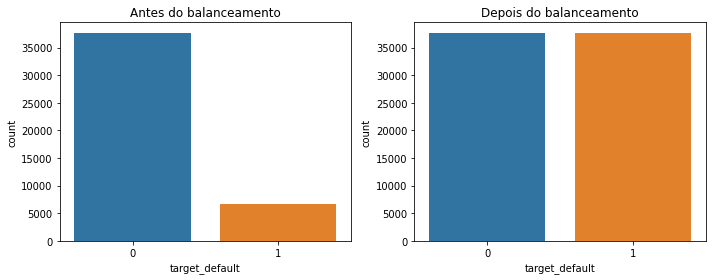

In [51]:
# plotar um gráfico de barras para visualizar a distribuição das classes depois
# de balancear o dataset
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
sns.countplot(df_clean['target_default'], ax=ax[0])
ax[0].set_title('Antes do balanceamento')
sns.countplot(df_sample['target_default'], ax=ax[1]);
ax[1].set_title('Depois do balanceamento')

plt.tight_layout()

### Separando o *dataset*

Com o conjunto de dados balanceados podemos utilizar a função `train_test_split`, também do *Scikit-Learn*, para separar nossos dados entre o cojunto de treino e o conjunto de testes, lembrando que só iremos utilizar o último na avaliação final do nosso modelo.

In [38]:
# importando os pacotes necessários
from sklearn.model_selection import train_test_split

# separar nossa matriz do vetor alvo
X = df_sample.drop('target_default', axis=1).select_dtypes(exclude='object')
y = df_sample['target_default']

# dividir os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

### *Cross Validation* com vários modelos de *Machine Learning*

Agora vamos aplicar a validação cruzada em vários modelos de machine learning e vamos escolher aquele que obtiver melhor resultado. Nesta etapa vamos usar os modelos "crus", ou seja, sem mudar os hiperparâmetros.

Os modelos que iremos avaliar são:
* Linear SVC
* XGBoost
* KNeighborsClassifier
* Regressão Logística
* Random Forest Classifier
* Método e Ensemble

Para esse problema de classificação vamos utilizar como métricas para avaliar o desempenho do modelo a precisão (`precision`), o *recall* e o *f1-score*.

Nosso modelo busca minimizar tanto a quantidade de *falses positives* quanto maximizar a quantidade de *true positives*.

A métrica recall prioriza que não haja *falses negatives* enquanto nos dá a proporção de positivos encontrados corretamente. Na precisão estamos assumindo que *falses positives* são ok e que não queremos ter *falses negatives* e também nos diz qual a proporção de identificações positivas que estavam corretas. O *f1-score* combina o *recall* e a precisão de modo que ele traz apenas um número levando em consideração as duas outras métricas.

In [92]:
# aqui vamos definir uma função onde fazemos a padronização dos dados e
# a validação cruzada de cada modelo passado
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

def validar_modelo(clf, X, y):

  X = np.array(X)
  y = np.array(y)

  model = make_pipeline(StandardScaler(), clf)
  scores = cross_validate(model, X, y, scoring=('precision', 'recall', 'f1', 'accuracy'))

  return scores

In [95]:
# importando os pacotes necessários
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# instanciando os modelos
lsvc = LinearSVC()
xgb = XGBClassifier()
kn = KNeighborsClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()
vc = VotingClassifier(estimators=[('lsvc',lsvc),('xgb',xgb),('kn',kn),('lr',lr),
                                  ('rf', rf)])

# avaliar os modelos
model = []
precision = []
recall = []
f1 = []
accuracy = []

for clf in (lsvc, xgb, kn, lr, vc, rf):
  model.append(clf.__class__.__name__)
  scores = validar_modelo(clf, X_train, y_train)
  recall.append(scores['test_recall'].mean())
  precision.append(scores['test_precision'].mean())
  f1.append(scores['test_f1'].mean())
  accuracy.append(scores['test_accuracy'].mean())

In [96]:
data = {'recall': recall, 'precision': precision, 'f1-score': f1, 'accuracy': accuracy}

pd.DataFrame(data=data, index=model)

,recall,precision,f1-score,accuracy
LinearSVC,0.591055,0.616079,0.603293,0.610841
XGBClassifier,0.662365,0.662085,0.662217,0.661663
KNeighborsClassifier,0.851087,0.690737,0.762567,0.734648
LogisticRegression,0.594449,0.615494,0.604772,0.611018
VotingClassifier,0.707089,0.700100,0.703571,0.701687
RandomForestClassifier,0.970691,0.958431,0.964521,0.964242


Podemos ver claramente que o modelo que mais se saiu bem foi o *Random Forest Classifier*, e mais do que isso, ele se saiu muito bem. Então não é surpresa que escolheremos ele ser nosso modelo final e avaliá-lo com os dados de teste. E como seu desempenho foi excelente não iremos perder tempo otimizando seus hiperparâmetros.

#### Avaliação final do modelo

Esta é a útima etapa do nosso projeto, é agora que iremos treinar de fato nosso modelo de Random Forest e avaliá-lo usando, finalmente, os dados de teste.

Para avaliar o modelo iremos utilizar o Relatório de Classificação, que nos dá várias métricas como precisão, recall, acurácia do nosso modelo comparando as predições e os dados reais, e também plotaremos uma Matriz de onfusão que nos retorna a relação entre os dados que nosso modelo preveu e os dados reais (de teste).

In [39]:
# importando os pacotes necessários
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [41]:
# instanciando e treinando o modelo com os dados de treino
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# fazendo a predição com os dados de teste
y_pred = rf.predict(X_test)

In [42]:
print(f'\nRelatório de Classificação:\n\n'
      f'{classification_report(y_test, y_pred)}')


Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      9455
           1       0.98      0.99      0.98      9376

    accuracy                           0.98     18831
   macro avg       0.98      0.98      0.98     18831
weighted avg       0.98      0.98      0.98     18831



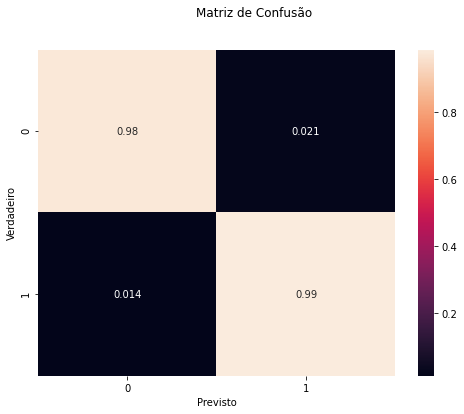

In [56]:
fig, ax = plt.subplots(figsize=(8,6))
fig.suptitle('Matriz de Confusão')

sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), ax=ax, annot=True)
ax.set_ylabel('Verdadeiro')
ax.set_xlabel('Previsto')

plt.show()

---

## Conclusão

Visualizando a Matriz de Confusão e o Relatório de Classificação vemos que nosso modelo se saiu ainda melhor com os dados de teste comparado ao desempenho da avaliação cruzada utilizando os dados de treino.

Vemos que conseguimos minimizar nossos falsos positivos, onde nosso modelo errou apenas 2,1% das classificações, ou seja, em 2,1% dos casos em que nosso modelo classificou o cliente como possívvel inadimplente ele errou. Enquanto maximizamos a quantidade de verdadeiros positivos, onde nosso modelo é capaz de acertar 99% das classificações, ou seja, em 99% dos casos em que nosso modelo classificou o cliente como possível inadimplente ele acertou.

Chega ao final este projeto, agradeço a todos que leram até aqui e abaixo deixo os links para o meu perfil no LinkedIn e do meu portfólio no GitHub para quem quiser me acompanhar em outros projetos de Data Science ou desenvolvimento em geral.

[Meu portfolio do Github](https://github.com/johnsigma/meuPortfolio)

[Meu perfil do LinkedIn](www.linkedin.com/in/johncunha42)